In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv('BlackFriday.csv', sep=",")

## Description

The dataset here is a sample of the transactions made in a retail store. The store wants to know better the customer purchase behaviour against different products. Specifically, here the problem is a regression problem where we are trying to predict the dependent variable (the amount of purchase) with the help of the information contained in the other variables.

Classification problem can also be settled in this dataset since several variables are categorical, and some other approaches could be "Predicting the age of the consumer" or even "Predict the category of goods bought". This dataset is also particularly convenient for clustering and maybe find different clusters of consumers within it.

In [3]:
data.shape

(537577, 12)

In [4]:
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [5]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [6]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
# Удаление строк, содержащих пустые значения
data_new_1 = data.dropna(axis=0, how='any')
(data.shape, data_new_1.shape)

((537577, 12), (164278, 12))

## Так как отсутствующие значения в столбцах Product_Category_2 и Product_Category_3 несут смысл, то не стоит их заменять средним или медианным значением, а заполнить нулями

In [8]:
data = data.fillna(0)
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [9]:
print (data['Gender'].unique())
print (data['Age'].unique())
print (data['City_Category'].unique())
print (data['Stay_In_Current_City_Years'].unique())

['F' 'M']
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
['A' 'C' 'B']
['2' '4+' '3' '1' '0']


## Все признаки из их смыслового значения имеет смысл кодировать целочисленными значениями, а не разделять на бинарные

In [10]:
from sklearn.preprocessing import LabelEncoder


In [11]:
le = LabelEncoder()
gender_int = le.fit_transform(data['Gender'])
data['Gender_int']=gender_int
del data['Gender']

Age_int = le.fit_transform(data['Age'])
data['Age_int']=Age_int
del data['Age']

City_Category_int = le.fit_transform(data['City_Category'])
data['City_Category_int']=City_Category_int
del data['City_Category']

Stay_In_Current_City_Years_int = le.fit_transform(data['Stay_In_Current_City_Years'])
data['Stay_In_Current_City_Years_int']=Stay_In_Current_City_Years_int
del data['Stay_In_Current_City_Years']

data.head()

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_int,Age_int,City_Category_int,Stay_In_Current_City_Years_int
0,1000001,P00069042,10,0,3,0.0,0.0,8370,0,0,0,2
1,1000001,P00248942,10,0,1,6.0,14.0,15200,0,0,0,2
2,1000001,P00087842,10,0,12,0.0,0.0,1422,0,0,0,2
3,1000001,P00085442,10,0,12,14.0,0.0,1057,0,0,0,2
4,1000002,P00285442,16,0,8,0.0,0.0,7969,1,6,2,4


In [15]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

/srv/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


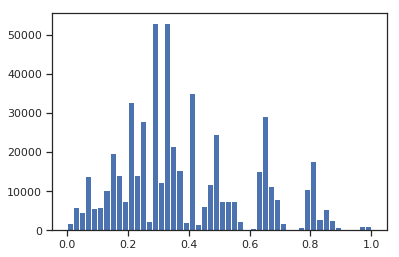

In [23]:


sc = MinMaxScaler()
sc_data = sc.fit_transform(data[['Purchase']])

plt.hist(sc_data, 50)
plt.show()

In [25]:
data_new=data.drop(['Purchase'],axis='columns')
data_new['Purchase']=sc_data

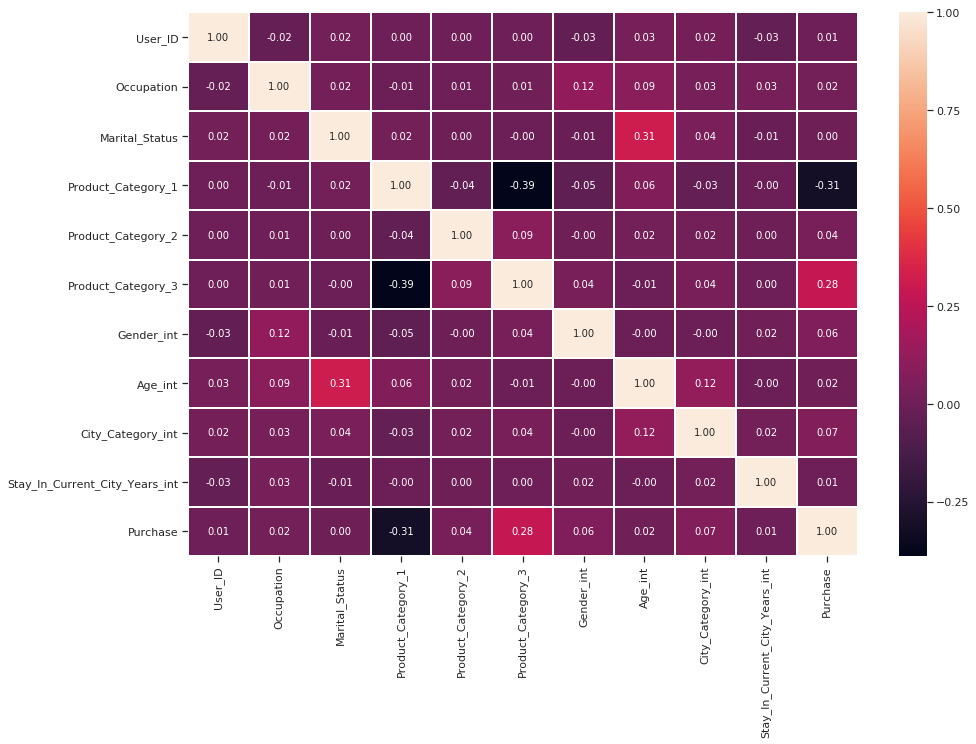

In [26]:
plt.figure(figsize=(15, 10))
sns.heatmap(data_new.corr(),annot=True, fmt='.2f', linewidths=1)